In [1]:
import warnings
import pandas as pd
import numpy as np
from sys import path

path.append('../src')
from dstools.dstools import DStools as dst

warnings.filterwarnings("ignore")

In [2]:
"""data = pd.read_fwf('./sample_dataset/auto-mpg.data', \
                   names=[ 'mpg','cylinders','displacement','horsepower','weight','acceleration','year','origin','name'], \
                   na_values='?')
"""

data =  pd.read_csv("./sample_dataset/wages_data_iso8859.csv", encoding='ISO-8859-1')
ds = dst()

* Data types from CSV before processing 

In [3]:
data.dtypes

case_number                   object
case_received_date            object
decision_date                 object
case_status                   object
employer_name                 object
employer_num_employees       float64
employer_yr_established      float64
job_education                 object
job_experience_num_months    float64
job_state                     object
job_foreign_lang_req          object
job_level                    float64
employee_citizenship          object
wage_offer                   float64
wage_unit                     object
dtype: object

* Seperating numerical/categorical/temporal features and applying datatypes to dataframe


<br>
process_dtypes options 
<br>
 - tapply to selectively transform datatypes
<br>
 - thr acts as a threshold beyond which a feature is considered numerical
<br>
 - for example if a feature has 2000 unique categories it could be transformed to encoded to numeric
 <br>

In [4]:
features = ds.process_dtypes(data, tapply = True, thr=30)

feature  employer_name  contains  17985  unique values, converted to numeric encoding
feature  job_state  contains  57  unique values, converted to numeric encoding
feature  job_level  contains  4  unique values, converted to categorical encoding
feature  employee_citizenship  contains  176  unique values, converted to numeric encoding


* Data types from CSV after processing 
<br>
-Notice datetime and category updates to fetures

In [5]:
data.dtypes

case_number                          object
case_received_date           datetime64[ns]
decision_date                datetime64[ns]
case_status                        category
employer_name                         int16
employer_num_employees              float64
employer_yr_established             float64
job_education                      category
job_experience_num_months           float64
job_state                              int8
job_foreign_lang_req               category
job_level                          category
employee_citizenship                  int16
wage_offer                          float64
wage_unit                          category
dtype: object

Process dtype returns a dictionary of features, keyed according to their type. 
 - skip: feature that has vary low variance, such as index columns etc
 - encode: features that do not fit well in numercal due to low number of unique values and should be encoded
 - dtfeatures: temporal features such as date 

In [6]:
features

defaultdict(list,
            {'skip': ['case_number'],
             'dtfeatures': ['case_received_date', 'decision_date'],
             'catfeatures': ['case_status',
              'job_education',
              'job_foreign_lang_req',
              'job_level',
              'wage_unit'],
             'encode': ['employer_name', 'job_state', 'employee_citizenship'],
             'numfeatures': ['employer_num_employees',
              'employer_yr_established',
              'job_experience_num_months',
              'wage_offer']})

To analyze a range of continuous features at a glance, the dist_plots method can be used. It generates density plots(green) along with approximated distribution (red) for a given feature

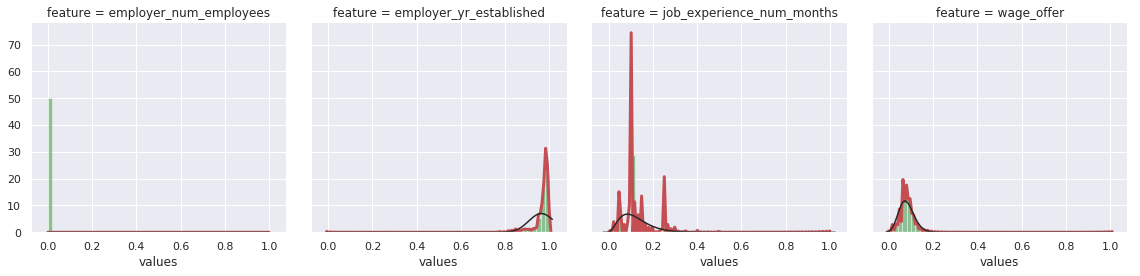

In [7]:
ds.dist_plots(data, features.get('numfeatures'), scale=True)

Similarly for categorical features, count plots can be generated for a list of features (the features dictionary generated above comes in handy here). Optionally, a xhue option can be passed to generate count plots that consider another categorical feature.

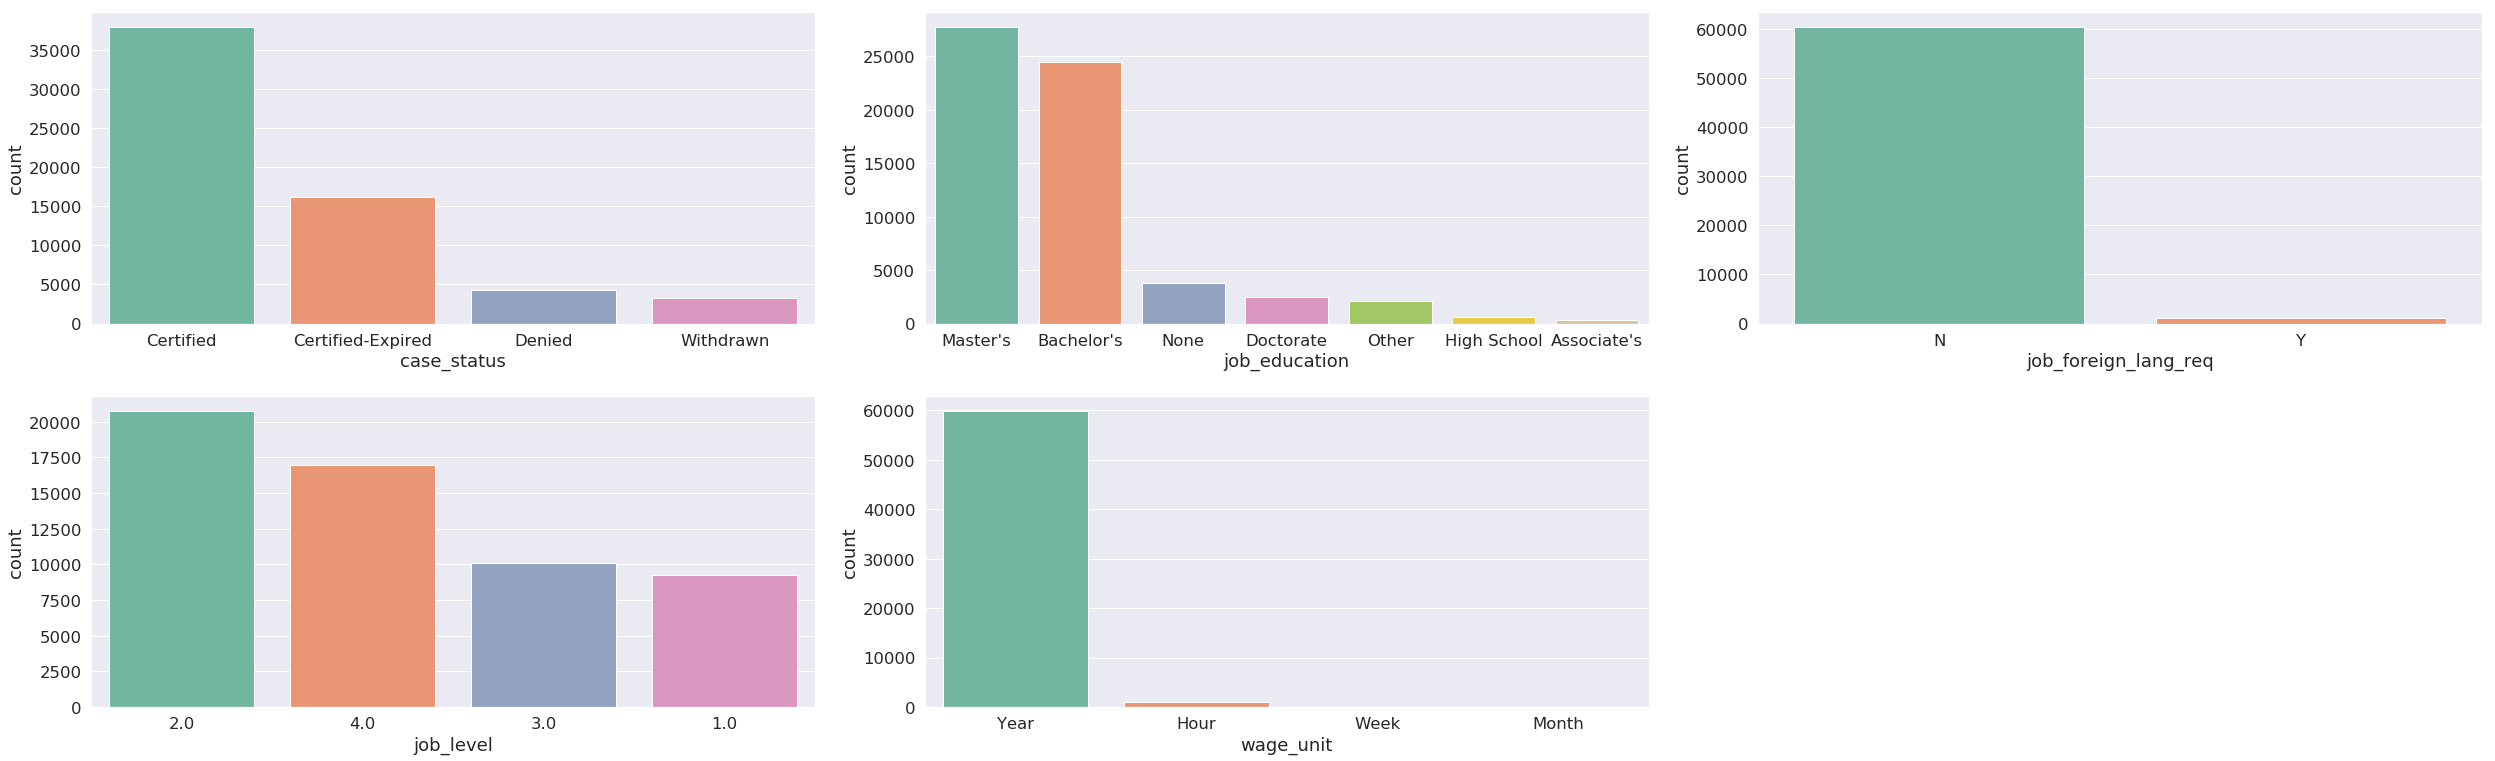

In [8]:
ds.count_plots(data, features.get('catfeatures'))

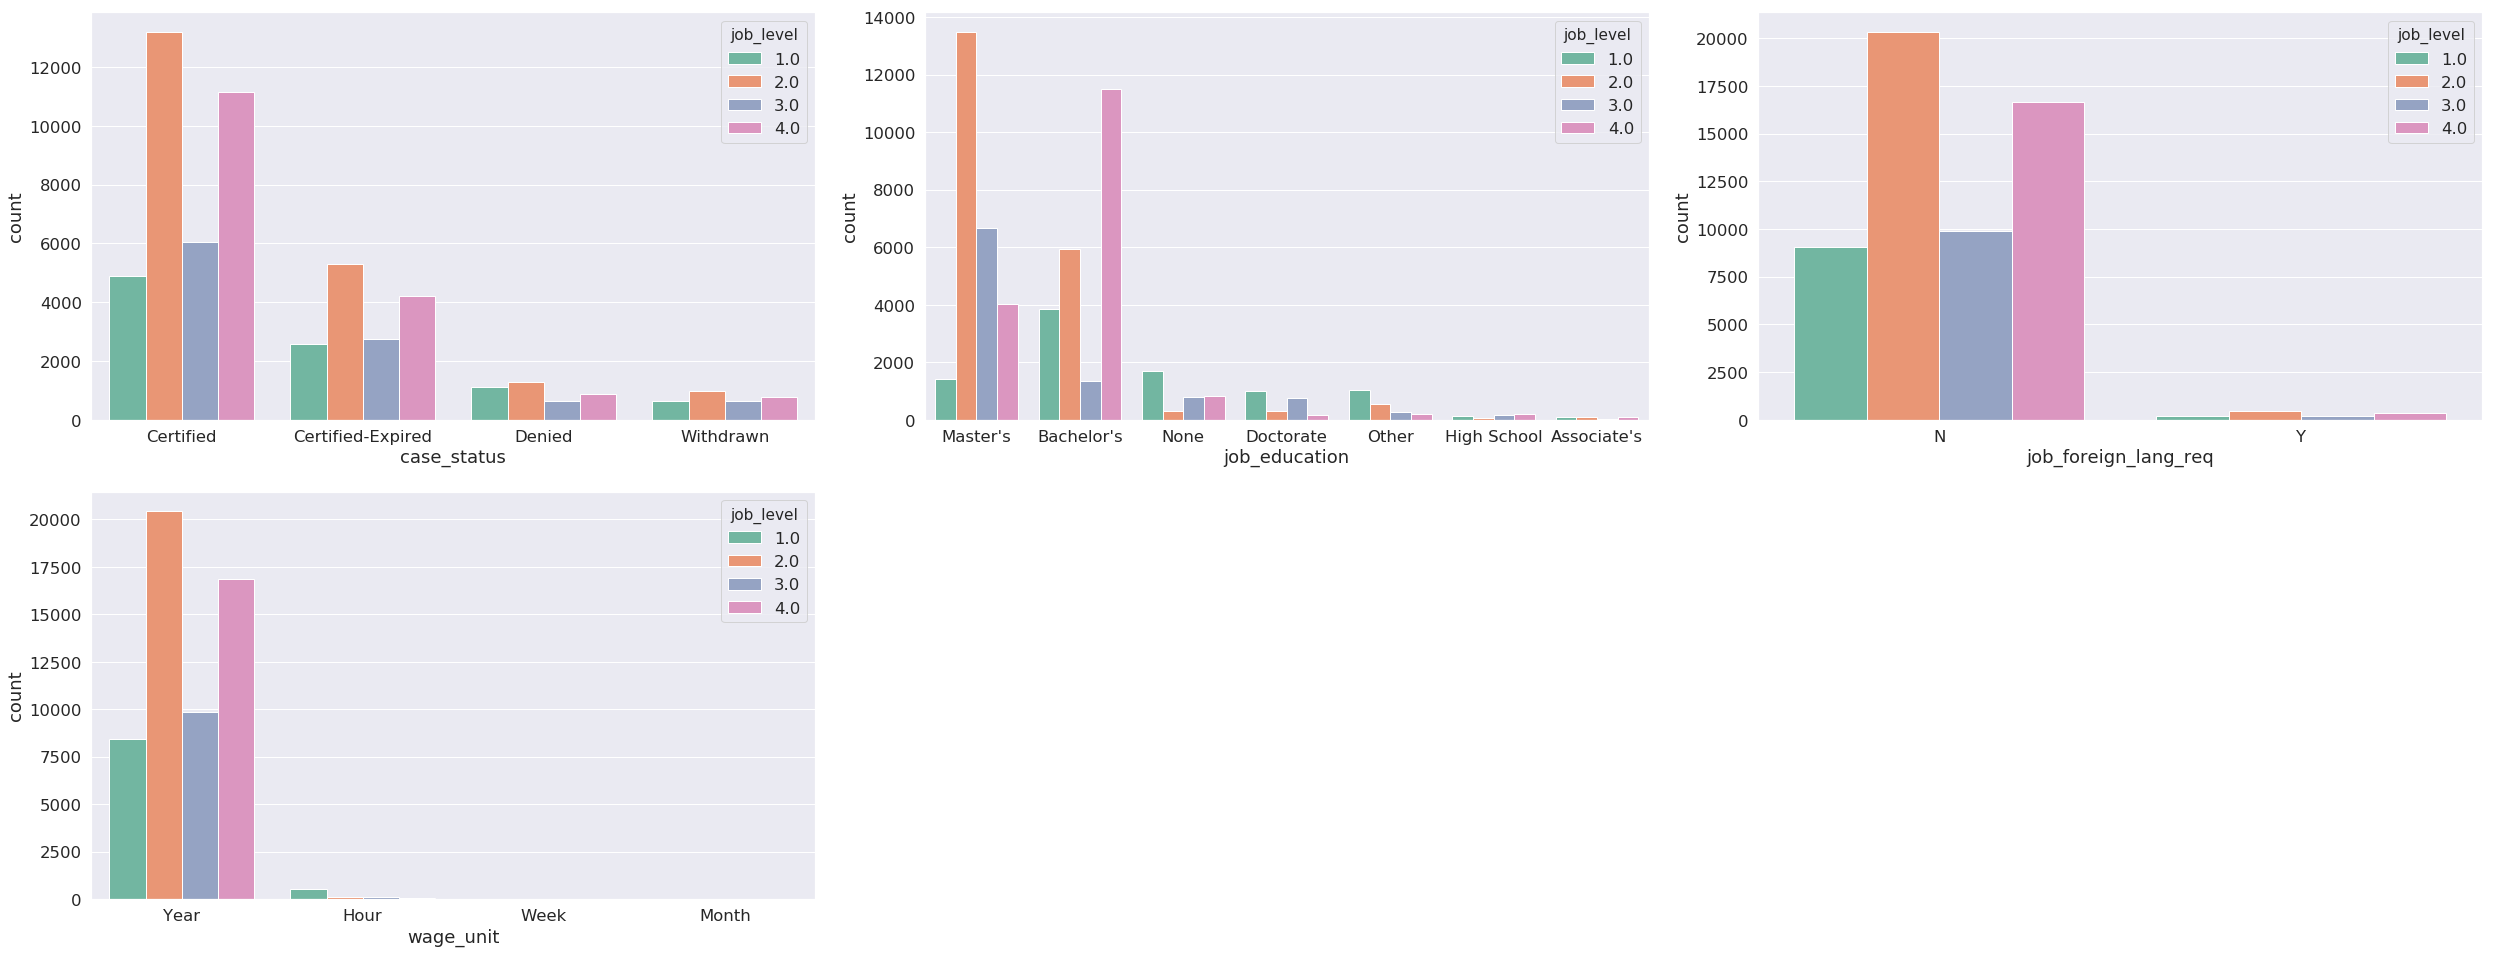

In [9]:
ds.count_plots(data, features.get('catfeatures').copy(), xhue="job_level")

* A Quick way to find out highly correlated pairs in data,  t controls the boundry correlation threshold to filter the features
<br> and generates a sns themed plot 

None of the features have correlation higher than  0.8


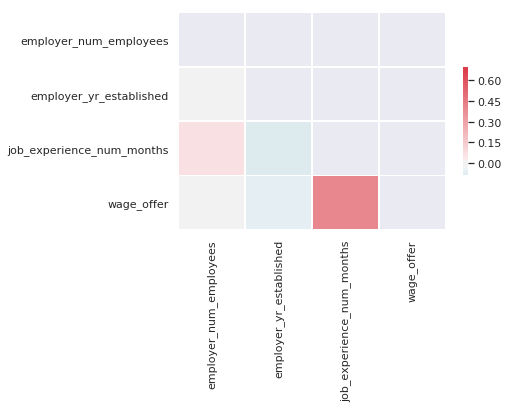

In [10]:
ds.check_correlations(data, features.get("numfeatures"), t=0.8, plot=True)